In [1]:
import fitsio
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from base64 import b64encode
import mechanize
from astropy import units as u
from astropy.coordinates import SkyCoord, get_moon, EarthLocation
from astropy.time import Time
from astropy.io import fits
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#12GB file, be carefull
file_name = 'spAll-v5_10_0.fits'
fits = fitsio.FITS(file_name)

In [3]:
#View columns of file
#fits[1]

In [4]:
#Precise time
#r=fits[1]['TAI'].read()
#r[:100]

In [5]:
#r[:10]

In [6]:
#sky_time[:100]

In [7]:
#columns we are interested in
sky_cols = ['OBJTYPE','MJD','PLATE','FIBERID','RA','DEC','THING_ID']

In [ ]:
%%time
#Reading columns
#http://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
skyobjs = {col: fits[1][col].read().byteswap().newbyteorder() for col in sky_cols}

In [9]:
#skyobjs['TIME']=sky_time

In [10]:
df_SKY = pd.DataFrame(skyobjs)
#df_SKY[:100]

In [11]:
new_SKY = df_SKY.query('OBJTYPE=="SKY".ljust(16)')
new_SKY[149:210]
#SKY TAI not in spALL file

,DEC,FIBERID,MJD,OBJTYPE,PLATE,RA,THING_ID
1472,-0.237345,473,55181,SKY,3586,6.956405,-1
1479,0.061693,480,55181,SKY,3586,6.954507,-1
1485,-0.554127,486,55181,SKY,3586,6.771777,-1
1495,-0.204741,496,55181,SKY,3586,6.658858,-1
1503,0.658393,504,55181,SKY,3586,6.669461,-1
1511,0.363772,512,55181,SKY,3586,6.659876,-1
1529,0.381387,530,55181,SKY,3586,6.908220,-1
1531,0.390948,532,55181,SKY,3586,6.891065,-1
1549,1.063605,550,55181,SKY,3586,7.075884,-1
1553,0.948842,554,55181,SKY,3586,7.039492,-1


In [12]:
DEC = np.array(new_SKY['DEC'].tolist())
FIBERID = np.array(new_SKY['FIBERID'].tolist())
MJD = np.array(new_SKY['MJD'].tolist())
RA = np.array(new_SKY['RA'].tolist())

In [13]:
sky_coords=np.vstack((RA,DEC)).T
sky_coords

array([[  31.311313,   27.030181],
       [  31.3252  ,   27.232539],
       [  31.038112,   26.979747],
       ..., 
       [ 159.10472 ,   26.235868],
       [ 159.15258 ,   25.668823],
       [ 159.40754 ,   25.284333]])

In [14]:
c = SkyCoord(sky_coords, frame='icrs', unit='deg')

In [15]:
t=Time(57346.5, format='mjd')
get_moon(t)
#print(t.tt)

<SkyCoord (GCRS: obstime=57346.5, obsgeoloc=[ 0.  0.  0.] m, obsgeovel=[ 0.  0.  0.] m / s): (ra, dec, distance) in (deg, deg, AU)
    (344.34699294, -5.19798607, 0.00247009)>

In [54]:
def get_file(plate, name_of_file):
    url = 'https://data.sdss.org/sas/ebosswork/eboss/spectro/redux/v5_10_0/spectra/%s/%s'%(plate,name_of_file)
    username = 'sdss'
    password = '2.5-meters'

    # I have had to add a carriage return ('%s:%s\n'), but
    # you may not have to.
    b64login = b64encode('%s:%s' % (username, password))

    br = mechanize.Browser()
    br.set_handle_robots(False)
    
    br.addheaders.append( 
      ('Authorization', 'Basic %s' % b64login )
    )

    br.open(url)
    r = br.response()
    data = r.read()

    with open('%s'%(name_of_file),'wb') as output:
          output.write(data)

In [60]:
plates   = list(new_SKY['PLATE'][:210].values)
mjds   = list(new_SKY['MJD'][:210].values)
fiberids   = list(new_SKY['FIBERID'][:210].values)
print (plates)

[10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586, 3586,

In [61]:
files = ['spec-%s-%s-%s.fits'%(plate,mjd,str(fiberid).zfill(4)) for plate,mjd,fiberid in zip(plates,mjds,fiberids)]
plate_n = ['%s'%(plate) for plate in plates]
#f=open('sky_members.dat', 'w')
#for c in range(len(files)):
#    f.write(files[c]+'\n')
#f.close()

In [ ]:
#ONLY USE TO GET NEW FILES
for plate, names in zip(plates, files):
    get_file(plate, names)

In [59]:
def read_flux_file(files):
    fits = fitsio.FITS(files)
    cols = ['flux','loglam','ivar','and_mask','or_mask', 'sky', 'wdisp', 'model']
    d = {col: fits[1][col].read().byteswap().newbyteorder() for col in cols}
    df = pd.DataFrame(d)
    return df

In [21]:
dt_s=[]
for l in files:
        dt_x = read_flux_file(l).set_index('loglam')
        dt_s.append(dt_x)

In [22]:
# Masking
mask=[]
for s in dt_s:
    mask.append(s.query('and_mask==0').copy())
mask[1].head()

,and_mask,flux,ivar,model,or_mask,sky,wdisp
loglam,,,,,,,
3.5516,0,-1.165384,0.029658,-0.250710,67698688,5.157341,1.587891
3.5517,0,-14.165944,0.063016,-0.250872,589824,5.875859,1.588487
3.5518,0,16.024292,0.057923,-0.251089,0,6.063671,1.589084
3.5519,0,-5.277486,0.063328,-0.251334,0,5.982594,1.589683
3.5520,0,-8.106428,0.068203,-0.251649,0,5.541363,1.590284


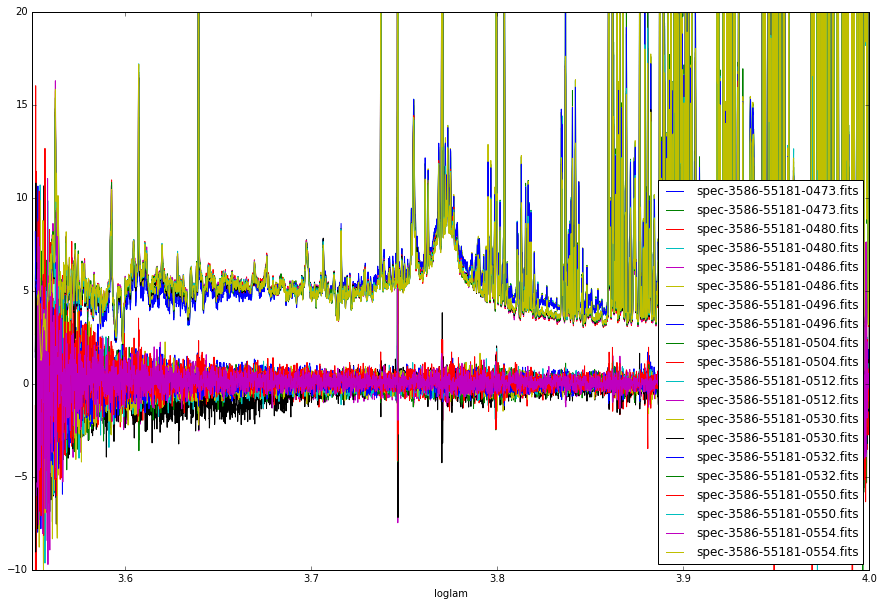

In [23]:
fig = plt.figure(figsize = (15, 10))
xlimits = [3.55,4]
ylimits = [-10,20]
for i in range(0,10):
    dt_s[i]['flux'].plot(label=files[i],xlim=xlimits, ylim=ylimits)
    dt_s[i]['sky'].plot(label=files[i],xlim=xlimits, ylim=ylimits)
plt.legend(loc='best')

In [24]:
for i in range(len(files)):
        dt_s[i]['flux_%s'%(i)] = dt_s[i]['flux']
        dt_s[i]['ivar_%s'%(i)] = dt_s[i]['ivar']
        dt_s[i]['sky_%s'%(i)] = dt_s[i]['sky']

In [25]:
x =range(len(files))
result = pd.concat([dt_s[i][['flux_%s'%(i),'ivar_%s'%(i),'sky_%s'%(i)]] for i in x], axis=1)
all_sky= result.fillna(0).copy()
all_sky.head()

,flux_0,ivar_0,sky_0,flux_1,ivar_1,sky_1,flux_2,ivar_2,sky_2,flux_3,...,sky_57,flux_58,ivar_58,sky_58,flux_59,ivar_59,sky_59,flux_60,ivar_60,sky_60
loglam,,,,,,,,,,,,,,,,,,,,,
3.5516,1.428281,0.034104,5.546210,-1.165384,0.029658,5.157341,5.506318,0.021518,2.637087,1.722933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.5517,1.963622,0.066039,6.490531,-14.165944,0.063016,5.875859,0.007805,0.063708,5.856822,2.685668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.5518,2.108577,0.069914,6.335851,16.024292,0.057923,6.063671,2.885284,0.068792,5.726130,-9.043678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.5519,-7.500133,0.082193,6.105857,-5.277486,0.063328,5.982594,-4.001166,0.071985,5.690097,10.791830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.5520,-4.442696,0.085146,6.170739,-8.106428,0.068203,5.541363,0.131262,0.071580,5.800393,2.615612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
all_sky['sum_flux_sky_ivar']=0
all_sky['sum_ivar']=0
all_sky['sum_sky']=0
for i in x:
    all_sky['sum_flux_sky_ivar'] += (all_sky['flux_%s'%(i)]+all_sky['sky_%s'%(i)])*all_sky['ivar_%s'%(i)]
    # Σ (flux + sky) * ivar /  Σ ivar
    all_sky['sum_ivar']      += all_sky['ivar_%s'%(i)]
all_sky['coadd'] = all_sky['sum_flux_sky_ivar']/all_sky['sum_ivar']

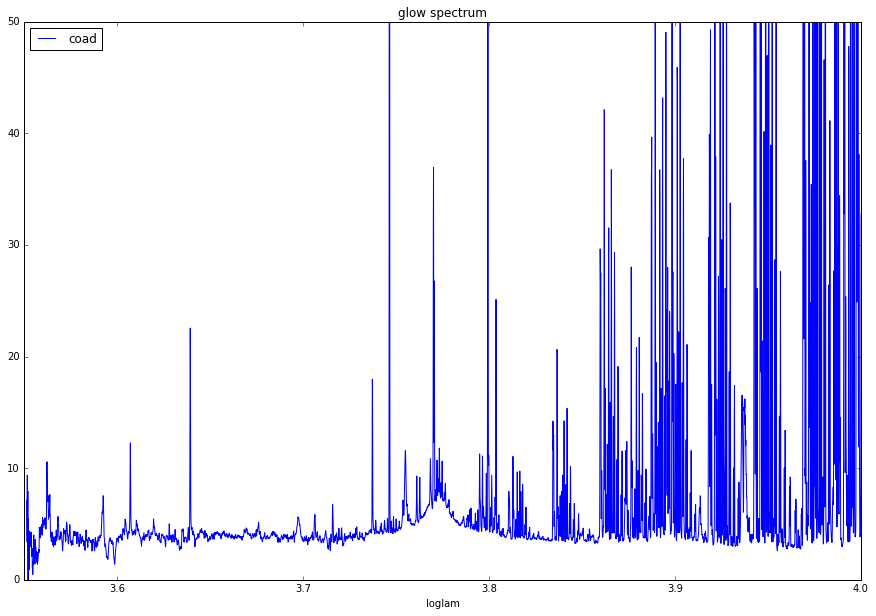

In [27]:
fig = plt.figure(figsize = (15, 10))
ax= plt.subplot(1,1,1)
xlimits = [3.55,4]
ylimits = [0,50]
all_sky['coadd'].plot(ax=ax, label='coad', xlim=xlimits, ylim=ylimits)
plt.legend(loc='best')
plt.title('glow spectrum')

In [28]:
#for i in range(len(files)):
#    h_beg=[]
#    h_end=[]
#    for k in range(4, 17):
#        h=fitsio.read_header(files[i],k)
#        h_beg.append(h['TAI-BEG'])
#        h_end.append(h['TAI-END'])
#    print ('start',h_beg)
#    print ('end',h_end)

In [29]:
from astropy.io.fits.hdu.hdulist import HDUList
test=fitsio.read_header(files[1],0)
test1=fitsio.read_header(files[1],4)
print 'total exposures=', test['NEXP']
#numbers = {col: fits[1][col].read().byteswap().newbyteorder() for col in number_cols}
#find_rows=pd.DataFrame(test)
#hdulist=fits.open(files[0]), hdulist.info()
#consistency=fitsio.read_header('spec-9003-57488-0007.fits', 4)
#print (test)

total exposures= 14


In [30]:
print test1['TAI-BEG'], test1['TAI-END']
#print consistency['TAI-BEG'], consistency['TAI-END']
len(files)

4767642805.0 4767643706.0


61

In [35]:
#FINDING INTERPLATE SKY TIME
fin_mean=[] #time for each moon sky observation interplate, used for moon angle
for r in range(len(files)): #mechanization of ubiquitious exposure count
    sampling=fitsio.read_header(files[r],0) #finding number of exposures
    h_beg=[]
    h_end=[]
    mean_per=[] #time for each moon sky observation intraplate
    for k in range(4, sampling['NEXP']+4): #4 is constant for everything
        h=fitsio.read_header(files[3],k)
        h_beg.append(h['TAI-BEG']) #ONLY VARIES WITH PLATE NUMBER, different for k's
        h_end.append(h['TAI-END']) #ONLY VARIES WITH PLATE NUMBER, different for k's
        mean_times=(h['TAI-BEG']+h['TAI-END'])/2
        mean_per.append(mean_times)
    tot=np.mean(mean_per)
    fin_mean.append(tot)
#    print 'start =',h_beg
#    print 'end =',h_end
#    print 'total mean =', tot
#    print 'mean per observation =', mean_per
#    print sampling['NEXP']
#print 'mean per observation interplate =', fin_mean
#print 'length', len(fin_mean)

In [36]:
#fin_mean

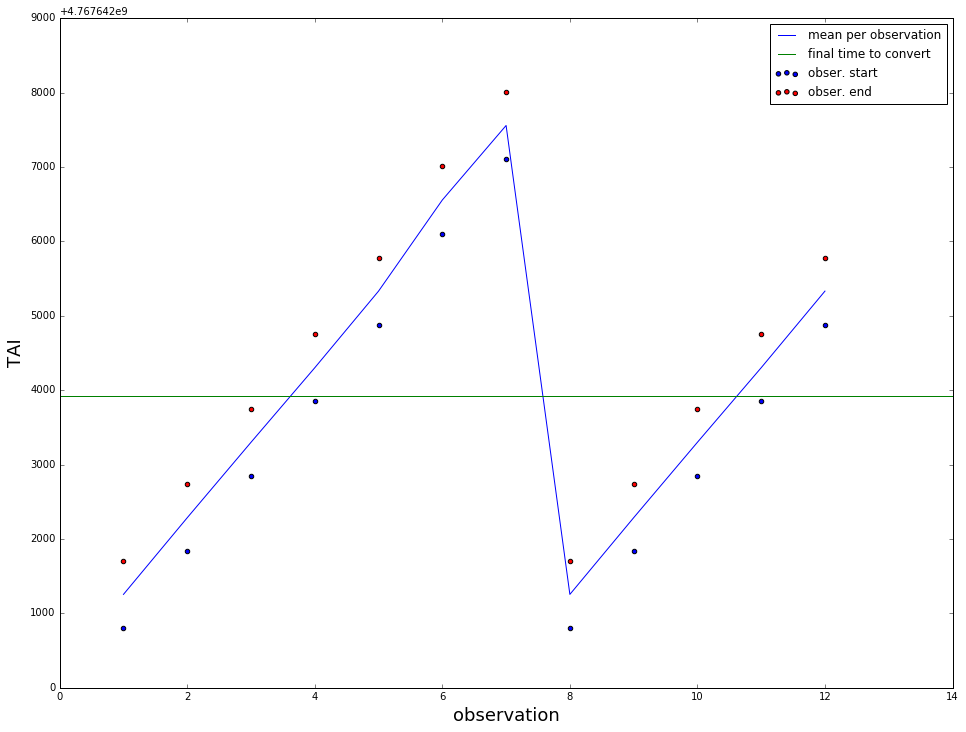

In [37]:
x=np.arange(1,13) #x needs to be mechanized
figure (figsize=(16,12))
plt.scatter(x, h_beg, c='blue', label='obser. start')
plt.scatter(x, h_end, c='red', label='obser. end')
plot(x, mean_per, label='mean per observation')
plt.axhline(y=tot, label='final time to convert', c='green')
plt.xlabel('observation', fontsize=18)
plt.ylabel('TAI', fontsize=18)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
legend()

In [38]:
#TAI TO MJD
new_time=np.array(fin_mean)
time_MJD=new_time/(86400)
moon_coords1=[]
moon_coords=[]
for i in range (len(time_MJD)):
    t=Time(time_MJD[i], format='mjd')
    moon_coords1.append(get_moon(t))
    moon_coords.append(moon_coords1[i].spherical)
moon_coords=list(moon_coords)
#print(moon_coords)

In [39]:
#print moon_coords[1]._values
#dir(moon_coords[1])
moon_coords2=[]
for i in range(len(moon_coords)):
    moon_coords2.append(moon_coords[i]._values)
moon_coords2=np.array(moon_coords2)
#moon_coords2

In [50]:
#SPLITTING ARRAY
new_sky_coords=sky_coords[149:210]
new_sky_RA = [item[0] for item in new_sky_coords]
new_sky_DEC = [item[1] for item in new_sky_coords]
moon_RA = [item[0] for item in moon_coords2]
moon_DEC = [item[1] for item in moon_coords2]
new_sky_RA=np.array(new_sky_RA)*(pi/180)
new_sky_DEC=np.array(new_sky_DEC)*(pi/180)
moon_RA=np.array(moon_RA)*(pi/180)
moon_DEC=np.array(moon_DEC)*(pi/180)

In [51]:
#TEST
#y_coord= sin(new_sky_RA[0]) * sin(moon_RA[0])
#x_coord= cos(new_sky_RA[0]) * cos(moon_RA[0])
#phi=(new_sky_DEC[0]-moon_DEC[0])
#inn=y_coord+(x_coord*cos(phi))
#arccos(inn)*180/pi

In [53]:
#MOON-SKY ANGLE CALCULATIONS
moon_sky_angle=[]
for i in range(len(new_sky_coords)):
    moon_sky_angle.append(arccos((sin(new_sky_RA[i])*sin(moon_RA[i]))+cos(new_sky_RA[i])*cos(moon_RA[i])*(cos(new_sky_DEC[i]-moon_DEC[i])))*(180/pi))
#list(moon_sky_angle)
moon_sky_angle

[107.43965477572942,
 107.41052385801054,
 107.28431798687029,
 107.14039467642763,
 107.07151802897252,
 107.08936171146189,
 107.33499456281993,
 107.31702810566436,
 107.43795816239735,
 107.41259769690264,
 107.58233762424422,
 107.60620281699467,
 107.70764568593273,
 107.61980913009621,
 107.85298280741482,
 107.70404945916474,
 108.01448540290161,
 108.00951171377629,
 107.97179663428939,
 107.93138149558911,
 108.07683979477085,
 108.14507542057783,
 108.23992547601902,
 108.38843975434159,
 108.28413765530964,
 108.52864028854154,
 108.50074069427028,
 108.69796259740721,
 108.69675148160513,
 108.87608394055071,
 108.92987336536238,
 109.18370922151841,
 109.18003826781063,
 109.44647375626425,
 109.45721271845905,
 109.54245917627783,
 109.75608391107635,
 110.94380423906554,
 110.91011326267747,
 110.78336410013171,
 110.82021130215375,
 110.75505911079453,
 110.64475564829289,
 110.60861878504731,
 110.61462787532479,
 110.46683810880154,
 110.49249499434184,
 110.36356241

In [145]:
from datetime import date
from astral import Astral, Location
#apache=Location(('Apache Point Observatory', 'NM', 32.780208, -105.819749))
l = Location()
l.name = 'Apache Point Observatory'
l.region = 'NM'
l.latitude = 32.780208
l.longitude = -105.819749
l.timezone = 'US/Mountain'
l.elevation = 2790

In [155]:
from jdutil import mjd_to_jd, jd_to_date
con1=[]
date_of_ob=[] #Actual dates
for i in range(len(files)):
    con1.append(mjd_to_jd(time_MJD[i]))
    date_of_ob.append(jd_to_date(con1[i]))
date_of_ob[1]

(2009, 12, 16.092245370149612)

In [159]:
year = [item[0] for item in date_of_ob]
month = [item[1] for item in date_of_ob]
day = [item[2] for item in date_of_ob]
#print year[1], month[1], day[1]
d=[]
for i in range(len(files)):
    d.append(date(int(year[i]),int(month[i]),int(day[i])))

In [163]:
moon_phases=[]
for i in range(len(files)):
    moon_phases.append(l.moon_phase(date=d[i]))
#0=New moon
#7=First quarter
#14=Full moon
#21=Last quarter
np.array(moon_phases)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
#moon_angle=np.zeros(len(new_sky_coords))
#moon_angle[149:210]
#new_SKY['MOON_ANGLE']=moon_angle

In [77]:
#df_SKY = pd.DataFrame(skyobjs)
#new_SKY = df_SKY.query('OBJTYPE=="SKY".ljust(16)')
#new_SKY[149:210]